<a href="https://colab.research.google.com/github/duyqu-chan/EDA-on-r-Foreveralone/blob/master/foreverAlone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanatory Data Analysis on Forever Alone Data Set

## Introduction

In 2016 a redditor created a survey to collect demographic data on the subreddit [/r/ForeverAlone]("https://www.reddit.com/r/ForeverAlone/"). Then they have deleted their account but the data set remained. It can be accessible from [here]("https://docs.google.com/spreadsheets/d/1-RHfT3xVxaUBJlQR32XBYniQakOntRkiKjJJmVbwvns/edit#gid=679156670") in Google spreadsheet form or from [here]("https://www.kaggle.com/kingburrito666/the-demographic-rforeveralone-dataset/downloads/foreveralone.csv") in _csv_ format. According to [Urban Dictionary]("https://www.urbandictionary.com/"), the slang phrase _Forever Alone_ is used for people who are so incompatible with the rest of the humanity that no one will ever date with them, in other words they define themselves as the loneliest people of the lonely planet. 

The self-assesment test consists of various interesting questions, listed below.

+ Timestamp (Date and time)
+ What is your gender?
+ How old are you?
+ What is your level of income?
+ What is your race?
+ How would you describe your body/weight?
+ Are you a virgin?
+ Is prostitution legal where you live?
+ Would you pay for sex?
+ How many friends do you have IRL (i.e. in real life)?
+ Do you have social anxiety/phobia?
+ Are you depressed?
+ What kind of help do you want from others? (Choose all that apply)
+ Have you attempted suicide?
+ Employment Status: Are you currently…?
+ What is your job title?
+ What is your level of education?
+ What have you done to try and improve yourself? (Check all that apply)

Notice that some of the questions are related to subject's self- perception and the others are reveals information about social status and psychological condition of the person of interest. This demographic data set is especially interesting for me because it combines individual's social competition, sexual selection and self-perception in one basket. Through explanatory data analysis it is possible to find significant relation between those features. For example level of education and income or bodyweight and virginity. Furthermore, we could predict suide commitment tendency, etc.
    




Import required libraries, first.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Read the data

In [0]:
df = pd.read_csv("foreveralone.csv")
df.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [0]:
df.shape

(469, 19)

There are 19 columns each corresponding a question, for the responses of 469 subjects in this set.

I start by cleaning the NA values first

In [0]:
df=df.dropna()
df.shape

(457, 19)

There were only 12 NA values coming from job title column. Since rows with NAs are small in number, by omitting them we do not loose information very much.

Let's list the descriptive statistics of numerical values in the set.

In [0]:
df.describe()

,age,friends
count,457.000000,457.000000
mean,24.032823,8.091247
std,6.045969,34.804727
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


Age and number of friends in real life have skewed distributions due to outliers. We can understand it by looking at the table above. Especially for IRL friend number, mean value is  drastically different than the median value.

### Suicide Attempt 

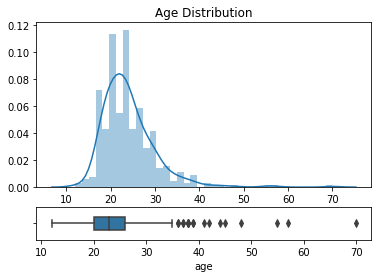

In [0]:
gridkw = dict(height_ratios=[10, 2])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw)
#plt.ylabel('Count')
sns.distplot(df.loc[:,'age'], ax=ax1).set_title("Age Distribution")#array, top subplot

sns.boxplot(df.loc[:,'age'], ax=ax2, width=.4) #bottom subplot

plt.show()

The youngest redditer in this survey is 12 years old and the oldest is 70. IQR is in between 20 and 26. There are 12 outliers.  Since age has positively skewed distribution, median is better statistic to define this sample. So we can treat age of a common redditer in /r/ForeverAlone as 23.

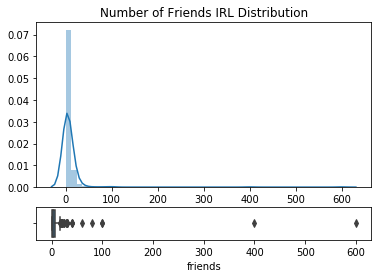

In [0]:
gridkw = dict(height_ratios=[10, 2])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw)
#plt.ylabel('Count')
sns.distplot(df.loc[:,'friends'],ax=ax1).set_title("Number of Friends IRL Distribution")#array, top subplot
sns.boxplot(df.loc[:,'friends'], ax=ax2) #bottom subplot
plt.show()

The loneliest redditer has zero friends in real life. This is more skewed distributian than age. Even median line is out of the box that defines IQR. It's hard to catch from graph by eye but there seems more outliers. Interestingly, there are some respondents who claims to have several hundreds of friends IRL. If reality is what they claimed, I do not understand why they contribute to /r/ForeverAlone subreddit. May be they are just trolling the survey.

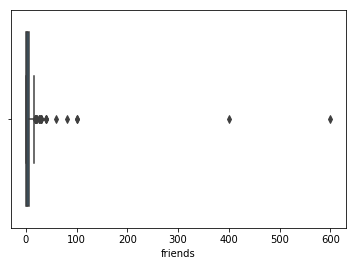

In [0]:
sns.boxplot(df.loc[:,'friends']) #bottom subplot

In [0]:
df.pivot_table(['age','friends'], ['attempt_suicide'], aggfunc='mean')

,age,friends
attempt_suicide,,
No,23.983871,9.078495
Yes,24.247059,3.770588


As seen from the table above suicidal redditters do not differ in age very much but they do differ on the basis of number of friends IRL. Socially isolated people tend to attempt suicide more.

Let's list the column names of the categorical variables

In [0]:
categorical = df.dtypes[df.dtypes == "object"].index 
df[categorical].describe()


,time,gender,sexuallity,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
count,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457
unique,456,4,3,13,23,4,2,2,3,2,2,50,2,9,275,9,61
top,5/18/2016 7:41:18,Male,Straight,$0,White non-Hispanic,Normal weight,Yes,No,No,Yes,Yes,I don't want help,No,Employed for wages,Student,"Some college, no degree",None
freq,2,382,404,150,328,265,342,353,312,297,303,216,372,171,50,131,101


There are four gender types including transgenders but out of 457 respondent 382 of them are male and 404 define thelselves as straight. White non-hispanics dominates the set with a number of 328. Interestingyly most of the people (342) in the set are virgins. 353 people live where prostitution is illegal and 312 of 457 people do not prefer to pay for sex. Unfortunatel 297 belives that they developed some kind of social anxiety and 303 respondent feel depressed. Although this is a very heartbreaking subset of humanity, nearly half (216) of the do not want help from others.

### Binary Categorical Variables and Income

Let's convert  columns with Yes/No answers to 1/0 to describe them numerically better. Additionally, income ranges are converted to their mean values. Since there is no upper bound for  . 

In [0]:
df_converted=pd.read_csv("foreveralone.csv") #re-read is needed because setting df_converted=df changes the str. of df, too.
df_converted.dropna()
df_converted.virgin.replace(('Yes', 'No'), (1, 0), inplace=True)
df_converted.prostitution_legal.replace(('Yes', 'No'), (1, 0), inplace=True)
df_converted.social_fear.replace(('Yes', 'No'), (1, 0), inplace=True)
df_converted.attempt_suicide.replace(('Yes', 'No'), (1, 0), inplace=True)
df_converted.depressed.replace(('Yes', 'No'), (1, 0), inplace=True)
df_converted.income.replace(('$0', '$1 to $10,000','$10,000 to $19,999','$20,000 to $29,999','$30,000 to $39,999','$40,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999',"$100,000 to $124,999","$125,000 to $149,999","$150,000 to $174,999", "$174,999 to $199,999", '$200,000 or more'), (0, 5000, 15000, 25000, 35000, 45000, 62500, 87500, 112500, 137500, 162500, 187500, 200000), inplace=True)
df_converted.describe()

,age,income,virgin,prostitution_legal,friends,social_fear,depressed,attempt_suicide
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,23.963753,19946.695096,0.750533,0.230277,7.956716,0.656716,0.665245,0.181237
std,6.023526,31671.260375,0.433167,0.421460,34.371500,0.475312,0.472409,0.385625
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,23.000000,5000.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000
75%,26.000000,25000.000000,1.000000,0.000000,7.000000,1.000000,1.000000,0.000000
max,70.000000,200000.000000,1.000000,1.000000,600.000000,1.000000,1.000000,1.000000


Yearly income average of the users is ~\$20000 and median income is just \$5000; 75% of the users are still virgin; only 23% of the places where the respondents live, prostitution is legal; 66% thinks that they have social anxiety/phobia; 67% feels depressed and yet only 18% of them attempted suicide.

### Correlation Plot

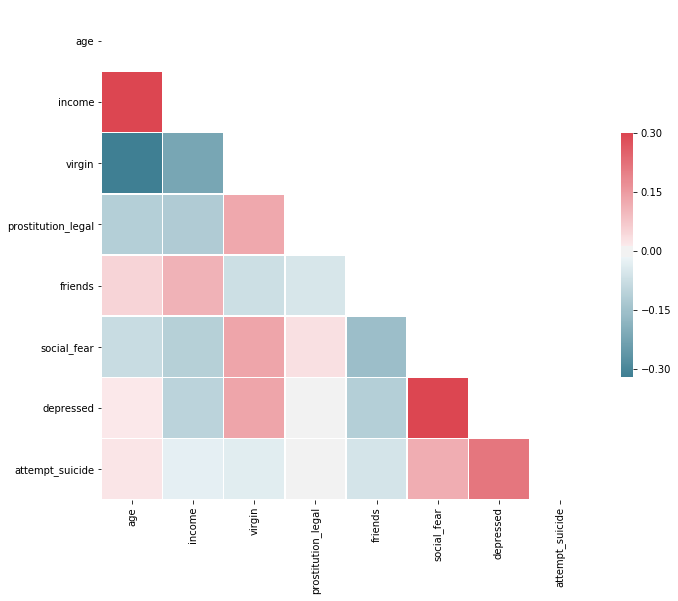

In [0]:
# Compute the correlation matrix
corr = df_converted.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Age is positively correlated with income and negatively correlated with virginity. As age increases people enhance in their careers and income level increases too; additionally they start mating and loose their virginity too. Suicide attempt is positively correllated  with depression and self-reported social anxiety mostly so we will focus on those three. Suicide attempt rate slightly negatively correlated with number of friend. As one's social circle enlarges, his/her depression level decreases.

### Suicide Attempt

To see much clearer picture of distribution, we can look at the pairwise plots according to every combination of the numerical columns

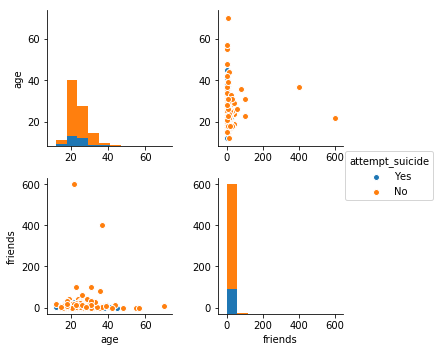

In [0]:
sns.pairplot(df,hue='attempt_suicide').set(alpha=0.3)

In the pair plots above, respondents who attempted suicide are colored with blue. Respondents who tried suicide are localized in younger ages (since age range of people who never attempted suicide is wider). Actually location of the "Yes" and "No" peaks do not differ much for both age and friend number but we can say that people with a friend number of fifty or above never attempted suicide. Since this is an self-assesment type survey, we lack the data of people who committed suicide succesfully. We could never know valuable information coming from those most miserable ones. 

In [0]:
#sns.pairplot(df_converted,hue='attempt_suicide')

Other than age and number of friends, pairwise plots of other converted numerical values did not seperated subredditters due to suicide tendency so we excluded them in our analysis.

### Depression

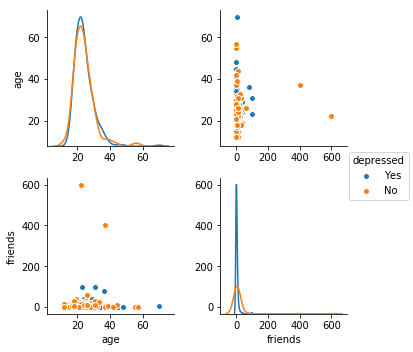

In [0]:
sns.pairplot(df,hue='depressed',diag_kind="kde")

When we look at the number of friends vs. age plot, respondents who feel depressed between 20 and 30 years old, actually have some amount of friends in reall life. However, older respondents who have small number of friends tend to feel depressed. So, we can conclude that number of friends in real life is a factor effecting one's level of depression if he/she is old.

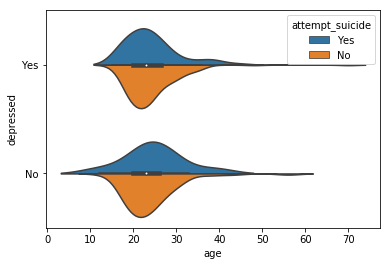

In [0]:
sns.violinplot(df.age, df.depressed ,hue='attempt_suicide', data=df, split=True)

According to the distribution above young loonely redditers no need to feel depressed to be suicidal. Non-depressed ones with suicidal tendency are slightly older in age. Right tail of the non-depressed and suicidal distribution is fatter so depression is not a major factor to effect older people's suicidal thoughts.

### Social Anxiety/Phobia

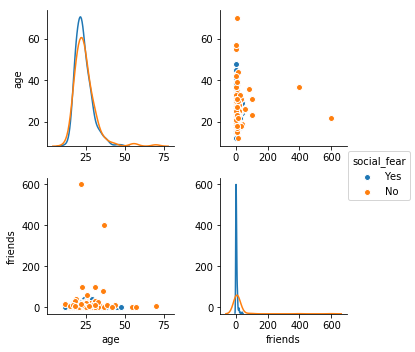

In [0]:
sns.pairplot(df,hue='social_fear',diag_kind="kde")

From the last plot we can deduce that social anxiety increases as one is socially isolated or anxiety is high in socially isolated respondents since the peak of "Yes" is sharper.

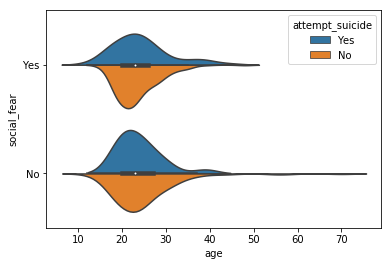

In [0]:
sns.violinplot(df.age, df.social_fear ,hue='attempt_suicide', data=df, split=True)

Age distribution of suicide attempters and non-attempters is plotted for both the ones with and without social anxiety is distributed. The age peak of suicidal redditer without social anxiet is slightly lower than the suicidal ones with some level of social fear. The small bumps in the right tail of blue graph are coming from the relatively older users whose age is in the neighborhood of 40. The rihght tail (older users) is fatter in the graph above but we cannot claim that social anxiety is and important factor determining one's suicidal tendency.

### Depression - Body Weight Relation

To focus on depressed redditers more, we filtered the data set.

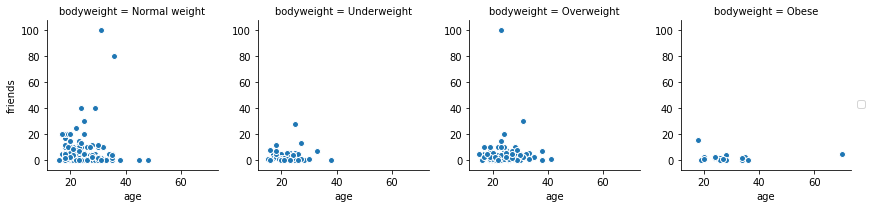

In [0]:
g = sns.FacetGrid(df[df.depressed=="Yes"], col='bodyweight')
>>> g = (g.map(plt.scatter, "age", "friends", edgecolor="w")
...       .add_legend())

Two extreems, underweight and obese people are small in number. If a depressed redditer is obese, he/she is also unlucky in number of friends. However, his/her underweight counterpart could have 0-15 friends IRL. May be society discriminates obese people more and this might make their depression bitter. Among all of the the weight groups above, depressed redditers with normal weight is luck in number of friends. They may still feel lonely but they have a wider span of friends when compared to others. However, age range is also wider in this group, then follows the overwieght depressed loosers.

### Sucide Attempt - Income Relation

The data plotted below is filtered to suicidal subredditers.

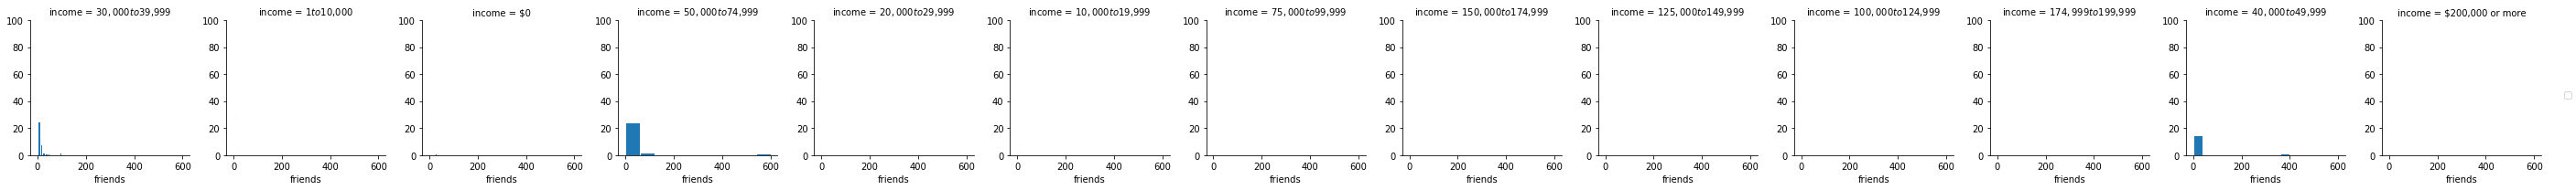

In [0]:
g = sns.FacetGrid(df, col='income')
>>> g = (g.map(plt.hist,  "friends", edgecolor="w")
...       .add_legend())

Large portion of suicidal /r/ForeverAlone is localized in the no (0\$) or very low income (1-10000\$) categories. It's no surprise that people with financial crisis tend to be more suicidal. Average number of friends is also smaller than ten for those guys.

## Conclusions

Suicide attempt is positively correllated with depression and self-reported social anxiety with a correlation coefficient ~.30. People with relatively large number of friends IRL never attempted to commit suicide in their life. The data set that we studied is composed of young people, respondents who are above median age value tend to have small sociall circle and feel depressed. However, young respondents still feel depressed even if number of friends are higher. Non-depressed older subredditters can still be suicidal. Social anxiety is high in socially isolated ones (since they might be avoiding crowds). No one wants to be friends with obese depressed subredditters but the other exreme is more tolarated by the society. Suicidal subredditers have zero or very low income.

In conclusion being depressed or not and anxiety are the most important factors determining ones tendency to commit suicide. Suicide attempters have different levels of depression or axiety depending on their age and number of friends. Mosty probably they form different clusters. kMeans algorithm can be employed to find subgroups of the suicidal lonely redditers. As a future work, logistic regression can be used to predict subredditters suicidal tendency. 

## References

+ [/r/ForeverAlone Subreddit]("https://www.reddit.com/r/ForeverAlone/")
+ [The Demographic /r/ForeverAlone Dataset]("https://www.kaggle.com/kingburrito666/the-demographic-rforeveralone-dataset/downloads/foreveralone.csv")
+ [Forever Alone Definition]("https://www.urbandictionary.com/define.php?term=Forever%20Alone")
+ [seaborn: statistical data visualization](https://seaborn.pydata.org/)
+ [The Python Graph Gallery, Seaborn](https://python-graph-gallery.com/seaborn/)
+ [Plotting a diagonal correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
+ [The Loneliest users on Reddit](https://www.kaggle.com/kingburrito666/the-loneliest-users-on-reddit)
+ [Young age problem](https://www.kaggle.com/sebik777/young-age-problem)